In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import RocCurveDisplay,confusion_matrix,classification_report

from sklearn.model_selection import RandomizedSearchCV

In [2]:
titanic_data = pd.read_csv("titanic.csv")

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
titanic_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
titanic_data.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
titanic_data.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

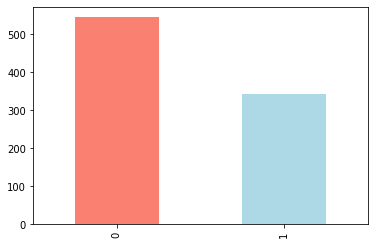

In [7]:
titanic_data.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
pd.crosstab(titanic_data.Survived,titanic_data.Sex)

Sex,female,male
Survived,,
0,81,464
1,233,109


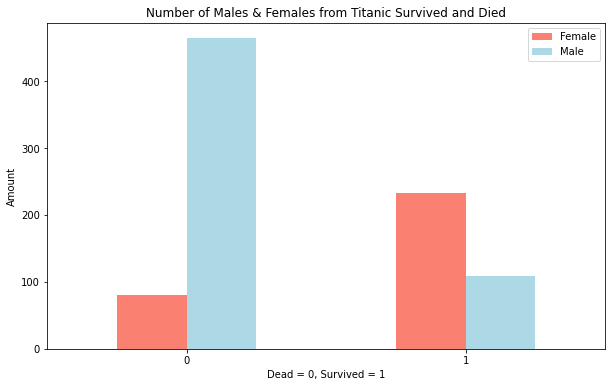

In [9]:
pd.crosstab(titanic_data.Survived,titanic_data.Sex).plot(kind="bar",color=["salmon", "lightblue"], figsize=(10,6));

plt.title("Number of Males & Females from Titanic Survived and Died")
plt.xlabel("Dead = 0, Survived = 1")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [10]:
pd.crosstab(titanic_data.Pclass,titanic_data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


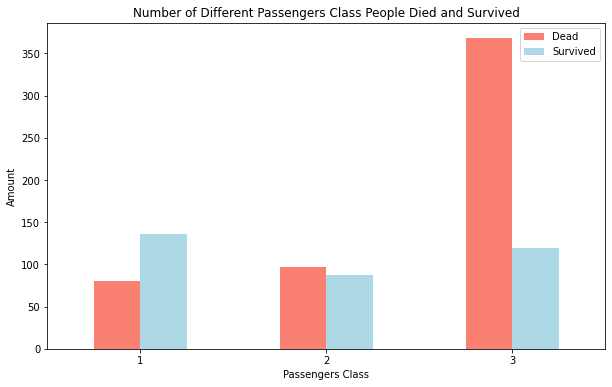

In [11]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived).plot(kind="bar",color=["salmon", "lightblue"], figsize=(10,6));

plt.title("Number of Different Passengers Class People Died and Survived")
plt.xlabel("Passengers Class")
plt.ylabel("Amount")
plt.legend(["Dead","Survived"])
plt.xticks(rotation=0);

In [12]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [13]:
label_enc = LabelEncoder()

Sex = label_enc.fit_transform(titanic_data.Sex)

Sex  # 1 =  Male & 0 = Female

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [14]:
titanic_data = titanic_data.drop(columns=["Name","Sex"], axis=1)

titanic_data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
titanic_data["Sex"] = Sex

titanic_data

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,1
883,1,1,19.0,0,0,30.0000,0
884,0,3,7.0,1,2,23.4500,0
885,1,1,26.0,0,0,30.0000,1


In [16]:
titanic_data.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.091875
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.113249
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.181137
Sex,-0.542152,0.129507,0.091875,-0.113249,-0.244337,-0.181137,1.000000


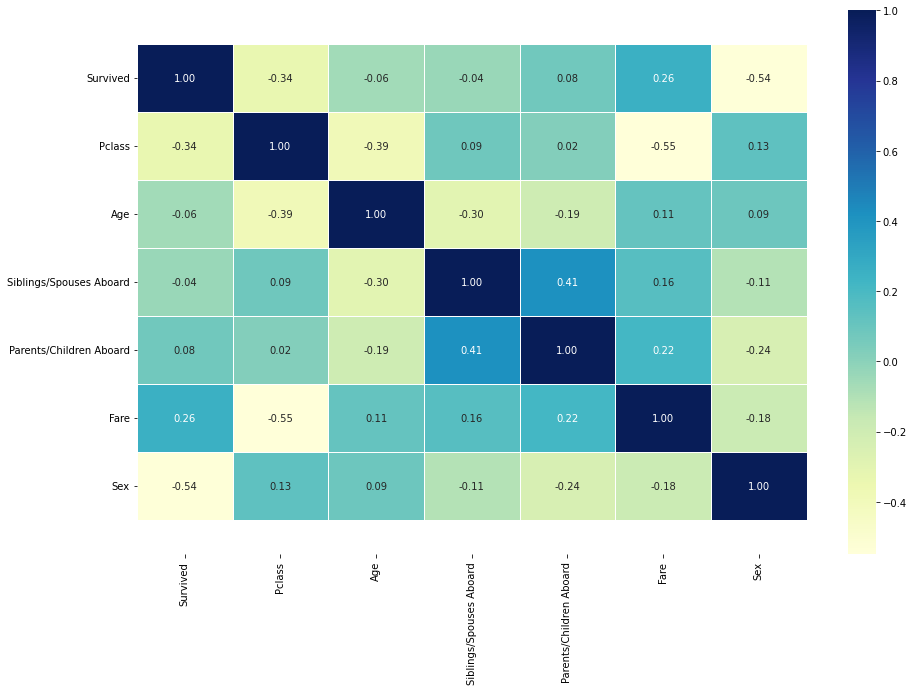

In [17]:
corr_matrix = titanic_data.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax =  sns.heatmap(corr_matrix, annot=True,linewidths=0.5,
                  fmt=".2f",cmap="YlGnBu")

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5);

In [18]:
X = titanic_data.drop("Survived", axis=1)

y = titanic_data.Survived

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
models = {"Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier()
         }

def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [21]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)

model_scores

{'Random Forest': 0.8202247191011236, 'KNN': 0.6966292134831461}

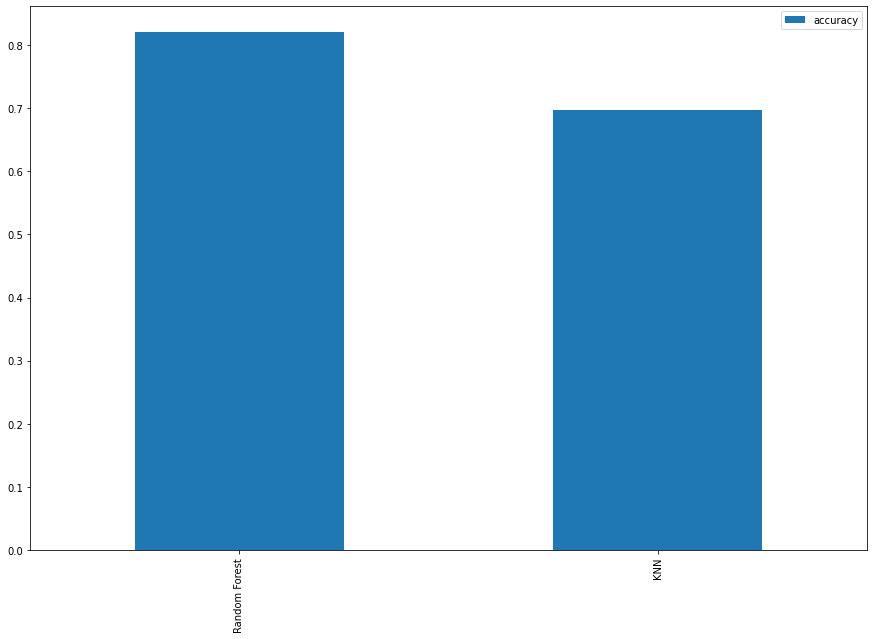

In [22]:
model_scores = pd.DataFrame(model_scores, index=["accuracy"])

model_scores.T.plot.bar(figsize=(15,10));

# Evaluation Function

In [23]:
def evaluation(model,x_train,x_test,y_train,y_test):
    
    model = model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    score = {"Recall": recall_score(y_test, y_pred),
             "Accuracy": accuracy_score(y_test, y_pred),
             "Precision": precision_score(y_test, y_pred),
             "F1": f1_score(y_test, y_pred)
            }
    
    return score

# ROC Curve Function

In [24]:
def roc_curve(model,x_train,x_test,y_train,y_test):
    
    model = model.fit(x_train, y_train)
    
    roc_curve = RocCurveDisplay.from_estimator(model,x_test,y_test)
    
    return roc_curve

# Confusion Matrix Function

In [25]:
def confusion_mat(model,x_train,x_test,y_train,y_test):

    model = model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    confusion_m = confusion_matrix(y_test, y_pred)
    
    return confusion_m

sns.set(font_scale = 1.5)

def plot_conf_mat(model,x_train,x_test,y_train,y_test):
    
    model = model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(confusion_mat(model,x_train,x_test,y_train,y_test),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

# Classification Report Function

In [26]:
def classification_repo(model,x_train,x_test,y_train,y_test):

    model = model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    classification_r = classification_report(y_test, y_pred)
    
    return classification_r

# Evaluation of KNeighborsClassifier

In [27]:
KNN = KNeighborsClassifier()

knn = evaluation(KNN,x_train, x_test,y_train, y_test)

knn

{'Recall': 0.5526315789473685,
 'Accuracy': 0.6966292134831461,
 'Precision': 0.6774193548387096,
 'F1': 0.6086956521739131}

In [28]:
knn_evaluation = pd.DataFrame(knn,index=[0])

knn_evaluation

,Recall,Accuracy,Precision,F1
0,0.552632,0.696629,0.677419,0.608696


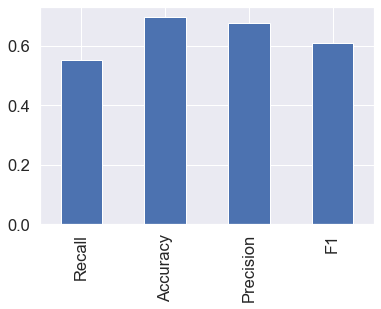

In [29]:
knn_evaluation.T.plot.bar(legend=False);

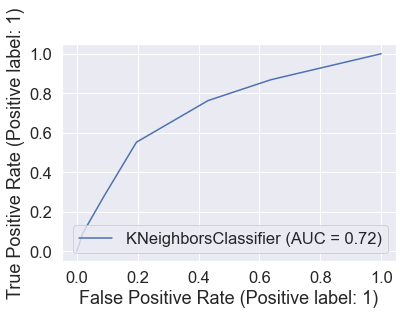

In [30]:
roc_curve(KNN,x_train, x_test,y_train, y_test);

In [31]:
res = classification_repo(KNN,x_train, x_test,y_train, y_test)

print(res)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       102
           1       0.68      0.55      0.61        76

    accuracy                           0.70       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.69      0.70      0.69       178



In [32]:
confusion_mat(KNN,x_train, x_test,y_train, y_test)

array([[82, 20],
       [34, 42]], dtype=int64)

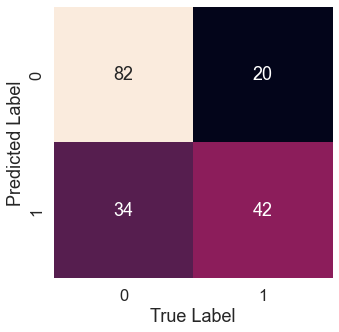

In [33]:
plot_conf_mat(KNN,x_train, x_test,y_train, y_test)

# Evaluation of RandomForestClassifier

In [34]:
rf_classifier = RandomForestClassifier()

random_forest_classifier = evaluation(rf_classifier,x_train, x_test,y_train, y_test)

random_forest_classifier

{'Recall': 0.75,
 'Accuracy': 0.8314606741573034,
 'Precision': 0.8382352941176471,
 'F1': 0.7916666666666666}

In [35]:
rf_evaluation = pd.DataFrame(random_forest_classifier,index=[0])

rf_evaluation

,Recall,Accuracy,Precision,F1
0,0.75,0.831461,0.838235,0.791667


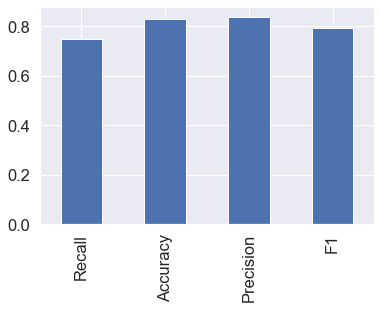

In [36]:
rf_evaluation.T.plot.bar(legend=False);

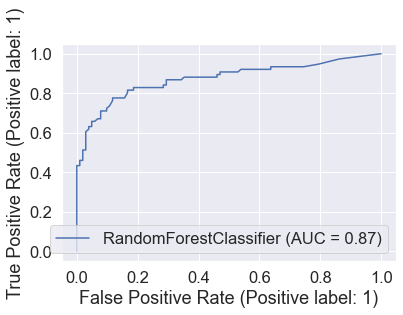

In [37]:
roc_curve(rf_classifier,x_train, x_test,y_train, y_test);

In [38]:
res = classification_repo(rf_classifier,x_train, x_test,y_train, y_test)

print(res)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.83      0.75      0.79        76

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.82       178



In [39]:
confusion_mat(rf_classifier,x_train, x_test,y_train, y_test)

array([[92, 10],
       [20, 56]], dtype=int64)

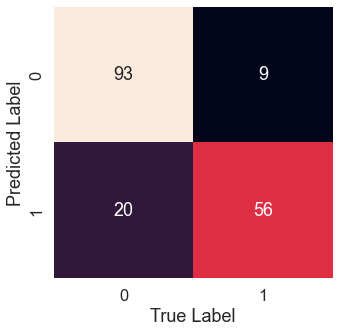

In [40]:
plot_conf_mat(rf_classifier,x_train, x_test,y_train, y_test)

# Hyperparameters Tuning

## Hyperparameters Tuning of RandomForestClassifier using RandomizedSearchCV

In [41]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None,3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [43]:
rs_rf.score(x_test,y_test)

0.848314606741573

## Hyperparameters Tuning of KNeighborsClassifier using RandomizedSearchCV

In [44]:
knn_grid = {'n_neighbors': range(1, 21),
            'weights': ['uniform', 'distance']}

KNN = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions=knn_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

KNN.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 21),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [45]:
KNN.best_params_

{'weights': 'uniform', 'n_neighbors': 18}

In [46]:
KNN.score(x_test,y_test)

0.6853932584269663